In [1]:
import json
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 10.5})
plt.rc('font', family='Times New Roman')


In [2]:
SEED = 20040508

In [3]:
output_dir = Path(".") / "output"

In [4]:
visdom_output_path = output_dir / "visdom"

### 1. 主实验

#### 1.1 训练

In [5]:
with open(visdom_output_path / "base.json", 'r') as f:
    base_0_analysis = json.load(f)

with open(visdom_output_path / "full.json", 'r') as f:
    full_0_analysis = json.load(f)

print([_['name'] for _ in base_0_analysis['jsons']['q_plot']['content']['data']])
print([_['name'] for _ in full_0_analysis['jsons']['q_plot']['content']['data']])


['realtime', 'avg']
['realtime', 'avg']


In [6]:
q_base_analysis = base_0_analysis['jsons']['q_plot']['content']['data'][0]
q_full_analysis = full_0_analysis['jsons']['q_plot']['content']['data'][0]


In [7]:
assert np.array_equal(q_base_analysis['x'], q_full_analysis['x'])
q_df = pd.DataFrame(
    {
        'x': q_base_analysis['x'][330:],
        'base': q_base_analysis['y'][330:],
        'full': q_full_analysis['y'][330:],
    }
)
q_df.head(5)

,x,base,full
0,329.0,-0.01871,0.09941
1,330.0,-0.05455,0.23061
2,331.0,-0.03903,0.12555
3,332.0,-0.05814,0.26627
4,333.0,-0.03268,0.19256


In [8]:
span= 100
q_df[['base_Rolling_Mean', 'full_Rolling_Mean']] = q_df[['base', 'full']].ewm(span=span).mean()
q_df[['base_Rolling_Std', 'full_Rolling_Std']] = q_df[['base', 'full']].ewm(span=span).std()
q_df[['base_CI_lower', 'full_CI_lower']] = q_df[['base_Rolling_Mean', 'full_Rolling_Mean']].to_numpy() - 1.96 * q_df[['base_Rolling_Std', 'full_Rolling_Std']].to_numpy()/np.sqrt(span)
q_df[['base_CI_upper', 'full_CI_upper']] = q_df[['base_Rolling_Mean', 'full_Rolling_Mean']].to_numpy() + 1.96 * q_df[['base_Rolling_Std', 'full_Rolling_Std']].to_numpy()/np.sqrt(span)
q_df.head(5)


,x,base,full,base_Rolling_Mean,full_Rolling_Mean,base_Rolling_Std,full_Rolling_Std,base_CI_lower,full_CI_lower,base_CI_upper,full_CI_upper
0,329.0,-0.01871,0.09941,-0.018710,0.099410,NaN,NaN,NaN,NaN,NaN,NaN
1,330.0,-0.05455,0.23061,-0.036809,0.165666,0.025343,0.092772,-0.041776,0.147483,-0.031842,0.183849
2,331.0,-0.03903,0.12555,-0.037564,0.152026,0.017877,0.069297,-0.041068,0.138443,-0.034060,0.165608
3,332.0,-0.05814,0.26627,-0.042864,0.181449,0.017857,0.080607,-0.046364,0.165650,-0.039364,0.197248
4,333.0,-0.03268,0.19256,-0.040745,0.183761,0.016066,0.069638,-0.043893,0.170112,-0.037596,0.197410


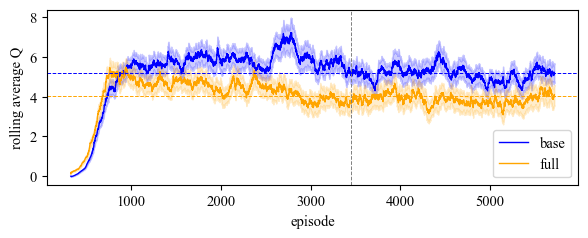

In [9]:
plt.figure(figsize=(6, 2.5))
plt.fill_between(
    q_df['x'],
    q_df['base_CI_lower'],
    q_df['base_CI_upper'],
    color='blue',
    alpha=0.2,
)
plt.fill_between(
    q_df['x'],
    q_df['full_CI_lower'],
    q_df['full_CI_upper'],
    color='orange',
    alpha=0.2
)
sns.lineplot(
    data=q_df,
    x='x',
    y='base_Rolling_Mean',
    color='blue',
    linewidth=1,
    label='base'
)
sns.lineplot(
    data=q_df,
    x='x',
    y='full_Rolling_Mean',
    color='orange',
    linewidth=1,
    label='full'
)
plt.axvline(3450, color='gray', linestyle='--', linewidth=.7)
plt.axhline(5.2043, color='b', linestyle='--', linewidth=.7)
plt.axhline(4.0299, color='orange', linestyle='--', linewidth=.7)

# plt.title('Rolling Average Q Value with Confidence interval')
plt.xlabel('episode', fontsize=10.5)
plt.ylabel('rolling average Q', fontsize=10.5)
plt.tight_layout()
plt.savefig('./report/Rolling_Average_Q_Value_with_Confidence_interval.svg')

In [10]:
table = q_df[['base', 'full']].describe()
table['analysis1'] = table['full'] - table['base']
table['analysis2'] = table['analysis1'] / table['base']
table

,base,full,analysis1,analysis2
count,5386.000000,5386.000000,0.000000,0.000000
mean,5.204163,4.029930,-1.174233,-0.225633
std,2.672723,2.545095,-0.127628,-0.047752
min,-0.058140,-0.042240,0.015900,-0.273478
25%,3.358900,2.065923,-1.292978,-0.384941
50%,4.934575,3.655085,-1.279490,-0.259291
75%,6.776285,5.502015,-1.274270,-0.188048
max,20.207760,17.345550,-2.862210,-0.141639


In [11]:
table.to_csv('./report/train_Q_value_Describe.csv')

#### 1.2 测试

In [12]:
with open(visdom_output_path / "test-base.json", 'r') as f:
    base_1_analysis = json.load(f)

with open(visdom_output_path / "test-full.json", 'r') as f:
    full_1_analysis = json.load(f)

print([_['name'] for _ in base_1_analysis['jsons']['reward_plot']['content']['data']])
print([_['name'] for _ in full_1_analysis['jsons']['reward_plot']['content']['data']])


['realtime', 'avg']
['realtime', 'avg']


In [13]:
reward_base_analysis = base_1_analysis['jsons']['reward_plot']['content']['data'][0]
reward_full_analysis = full_1_analysis['jsons']['reward_plot']['content']['data'][0]


In [14]:
assert np.array_equal(reward_base_analysis['x'], reward_full_analysis['x'])
reward_df = pd.DataFrame(
    {
        'x': reward_base_analysis['x'][1:],
        'base': reward_base_analysis['y'][1:],
        'full': reward_full_analysis['y'][1:],
    }
)
reward_df.head(5)

,x,base,full
0,0.0,19.688719,19.944431
1,1.0,20.593294,15.817937
2,2.0,20.267513,15.249086
3,3.0,26.431897,31.095846
4,4.0,10.019538,12.104902


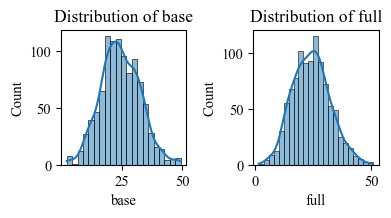

In [15]:
plt.figure(figsize=(4, 2.3))
for i, legend in enumerate(['base', 'full']):
    plt.subplot(1, 2, i+1)
    sns.histplot(reward_df[legend], kde=True)
    plt.title(f"Distribution of {legend}")
plt.tight_layout()
plt.savefig('./report/Test_Reward_Distribution.svg')


In [16]:
from scipy import stats
u = reward_df[['base', 'full']].mean()
std = reward_df[['base', 'full']].std()
stats.kstest(reward_df['base'], 'norm', (u['base'], std['base'])), stats.kstest(reward_df['full'], 'norm', (u['full'], std['full']))

(KstestResult(statistic=0.025929780574809602, pvalue=0.503762467156178, statistic_location=23.40128042554483, statistic_sign=1),
 KstestResult(statistic=0.028575101223268284, pvalue=0.380620436192206, statistic_location=20.590004691343882, statistic_sign=1))

In [17]:
reward_df['base'].mean()

24.549086909945853

In [18]:
# span = 100
# reward_df[['base_Rolling_Mean', 'full_Rolling_Mean']] = reward_df[['base', 'full']].ewm(span=span).mean()
# reward_df[['base_Rolling_Std', 'full_Rolling_Std']] = reward_df[['base', 'full']].ewm(span=span).std()
# reward_df[['base_CI_lower', 'full_CI_lower']] = reward_df[['base_Rolling_Mean', 'full_Rolling_Mean']].to_numpy() - 1.96 * reward_df[['base_Rolling_Std', 'full_Rolling_Std']].to_numpy()/np.sqrt(span)
# reward_df[['base_CI_upper', 'full_CI_upper']] = reward_df[['base_Rolling_Mean', 'full_Rolling_Mean']].to_numpy() + 1.96 * reward_df[['base_Rolling_Std', 'full_Rolling_Std']].to_numpy()/np.sqrt(span)
# reward_df.head(5)


In [19]:
table = reward_df[['base', 'full']].describe()
table['analysis1'] = table['full'] - table['base']
table['abalysis2'] = table['analysis1'] / table['base']
table

,base,full,analysis1,abalysis2
count,1000.000000,1000.000000,0.000000,0.000000
mean,24.549087,24.148111,-0.400976,-0.016334
std,8.015990,7.959346,-0.056644,-0.007066
min,2.473707,1.517596,-0.956111,-0.386509
25%,18.991936,18.450513,-0.541423,-0.028508
50%,24.122405,23.996892,-0.125513,-0.005203
75%,30.171378,29.305288,-0.866090,-0.028706
max,49.313445,50.664134,1.350690,0.027390


In [20]:
table.to_csv('./report/test_Reward_Describe.csv')

### 2. 消融实验

In [21]:
table = pd.DataFrame({'variant': [f"{bin(i)[2:]:0>3}" for i in range(8)]}).set_index('variant')
table

""
variant
000
001
010
011
100
101
110
111


#### 2.1 训练

In [22]:
ablation_0_analysis = {}
for i in range(8):
    variant = f"{bin(i)[2:]:0>3}"
    with open(visdom_output_path / f'{variant}.json', 'r') as f:
        ablation_0_analysis[variant] = json.load(f)['jsons']['q_plot']['content']['data'][0]

print([_['name'] for _ in ablation_0_analysis.values()])

['realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime']


In [23]:
q_df = pd.DataFrame(
    {
        variant: Q['y'][330:] for variant, Q in ablation_0_analysis.items()
    }
)
q_df.head(5)

,000,001,010,011,100,101,110,111
0,-0.01871,-0.01801,-0.30480,-0.30845,-0.00046,-0.00097,0.10036,0.09941
1,-0.05455,-0.05267,-0.14383,-0.14531,-0.00749,-0.00748,0.23168,0.23061
2,-0.03903,-0.03715,-0.29625,-0.29808,-0.02148,-0.02226,0.12624,0.12555
3,-0.05814,-0.05646,-0.27459,-0.27662,-0.00397,-0.00463,0.26787,0.26627
4,-0.03268,-0.03099,-0.26499,-0.26713,-0.00766,-0.00834,0.19389,0.19256


In [24]:
table['QMean'] = q_df.mean(axis=0)
table['QStd'] = q_df.std(axis=0)
table

,QMean,QStd
variant,,
000,5.204163,2.672723
001,5.297292,2.718489
010,4.298487,2.649752
011,4.235541,2.699715
100,5.214701,2.659215
101,5.217324,2.682660
110,4.104240,2.563149
111,4.029930,2.545095


#### 2.2 测试

In [25]:
ablation_1_analysis = {}
ablation_0_analysis = {}
for i in range(8):
    variant = f"{bin(i)[2:]:0>3}"
    with open(visdom_output_path / f'test-{variant}.json', 'r') as f:
        data = json.load(f)['jsons']
        ablation_0_analysis[variant] = data['q_plot']['content']['data'][0]
        ablation_1_analysis[variant] = data['reward_plot']['content']['data'][0]

print([_['name'] for _ in ablation_1_analysis.values()])
print([_['name'] for _ in ablation_0_analysis.values()])


['realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime']
['realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime', 'realtime']


In [26]:
q_df = pd.DataFrame(
    {
        variant: Q['y'][1:1001] for variant, Q in ablation_0_analysis.items()
    }
)
q_df.head(5)

,000,001,010,011,100,101,110,111
0,3.94277,3.90994,4.24596,3.63893,3.38290,4.94204,3.92293,4.44244
1,3.45006,3.08054,3.27192,2.22074,2.56691,2.78409,1.90698,2.00897
2,3.98292,5.09280,3.23332,4.64184,3.10703,4.69481,2.34491,3.47148
3,4.64066,8.38962,4.90795,4.92670,4.89770,3.99131,4.22683,3.63255
4,6.21310,9.83109,3.66462,5.37890,6.04443,4.74299,3.65381,4.23682


In [27]:
reward_df = pd.DataFrame(
    {
        variant: Reward['y'][1:1001] for variant, Reward in ablation_1_analysis.items()
    }
)
reward_df.head(5)

,000,001,010,011,100,101,110,111
0,19.688719,10.279284,14.105537,12.759648,10.274655,10.618205,14.721818,19.944431
1,20.593294,19.680463,21.067720,13.511059,17.479599,17.419578,16.379124,15.817937
2,20.267513,22.603017,21.531678,18.930711,20.358152,26.708143,24.839824,15.249086
3,26.431897,28.841302,36.805627,29.785271,26.043216,24.772740,41.391367,31.095846
4,10.019538,9.983614,18.212519,19.049485,22.749725,19.416469,11.587509,12.104902


In [28]:
table['QMean'] = q_df.mean(axis=0)
table['QStd'] = q_df.std(axis=0)
table['RewardMean'] = reward_df.mean(axis=0)
table['RewardStd'] = reward_df.std(axis=0)
table

,QMean,QStd,RewardMean,RewardStd
variant,,,,
000,4.675753,1.428991,24.549087,8.015990
001,5.669860,1.638306,24.574043,7.993989
010,3.709187,1.015078,24.713594,8.332525
011,3.792583,1.136120,24.093299,8.305111
100,4.741229,1.463549,24.478984,8.191821
101,4.816730,1.543927,24.672337,8.000261
110,3.468886,0.986688,24.590138,8.043580
111,3.760639,1.097190,24.148111,7.959346


In [29]:
further_table = pd.DataFrame({'variant': ['1xx', '0xx', 'x1x', 'x0x', 'xx1', 'xx0']}).set_index('variant')
further_table

""
variant
1xx
0xx
x1x
x0x
xx1
xx0


In [30]:
for i in range(3):
    q1_selected = (q_df.columns.str.get(i) == '1')
    reward1_selected = (reward_df.columns.str.get(i) == '1')
    q1 = q_df.loc[:, q1_selected]
    q0 = q_df.loc[:, ~q1_selected]
    reward1 = reward_df.loc[:, reward1_selected]
    reward0 = reward_df.loc[:, ~reward1_selected]
    further_table.loc['x'*i+'1'+'x'*(3-i-1), ['QMean', 'QStd', 'RewardMean', 'RewardStd']] = [q1.to_numpy().mean(), q1.to_numpy().std(), reward1.to_numpy().mean(), reward1.to_numpy().std()]
    further_table.loc['x'*i+'0'+'x'*(3-i-1), ['QMean', 'QStd', 'RewardMean', 'RewardStd']] = [q0.to_numpy().mean(), q0.to_numpy().std(), reward0.to_numpy().mean(), reward0.to_numpy().std()]

further_table

,QMean,QStd,RewardMean,RewardStd
variant,,,,
1xx,4.196871,1.422777,24.472393,8.047676
0xx,4.461846,1.545932,24.482506,8.162673
x1x,3.682824,1.067544,24.386286,8.162123
x0x,4.975893,1.572782,24.568613,8.047205
xx1,4.509953,1.586693,24.371948,8.065865
xx0,4.148764,1.366193,24.582951,8.143337


In [31]:
(further_table[::2].to_numpy() - further_table[1::2].to_numpy())/further_table[1::2].abs().to_numpy() * 100

array([[ -5.93867766,  -7.96643697,  -0.04130833,  -1.4088141 ],
       [-25.98668107, -32.12384345,  -0.74211471,   1.42805035],
       [  8.70594518,  16.13975139,  -0.85833159,  -0.9513623 ]])

In [32]:
table.to_csv('./report/Ablation_Analysis1.csv')
further_table.to_csv('./report/Ablation_Analysis2.csv')

### 3. 超参数敏感性分析

In [33]:
hyperparameter_output_path = output_dir / "hyperparameters"

In [34]:
from ray.tune.analysis import ExperimentAnalysis

In [35]:
hyperparameters = ["lr", "sync_every_rate", "gamma"]

In [36]:
analysis = ExperimentAnalysis(experiment_checkpoint_path=(hyperparameter_output_path / "hp_agent").resolve(), default_metric="mean_reward", default_mode="max")
df = analysis.dataframe()

In [37]:
df_last = df.groupby("trial_id").last().reset_index()
df_last.head(5)

,trial_id,mean_reward,mean_q,mean_r,timestamp,checkpoint_dir_name,done,training_iteration,date,time_this_iter_s,...,node_ip,time_since_restore,iterations_since_restore,config/lr,config/sync_every_rate,config/gamma,config/max_times,config/exploration_rate_min,config/episodes_per_tial,logdir
0,6df61_00000,22.928,"[7.33, 8.727, 4.24, 0.706, 2.103, 0.695, 0.703...","[0.567132869511441, 0.9690231143189372, 0.7565...",1748536145,None,True,3,2025-05-30_00-29-05,370.994145,...,10.11.27.88,1115.840540,3,0.000007,0.036919,0.878763,1,1,6000,6df61_00000
1,6df61_00001,25.185,"[24.537, 2.677, 3.951, 2.709, -0.207, 3.302, 1...","[0.5621768707482997, 0.9755871880157053, 0.759...",1748556622,None,True,60,2025-05-30_06-10-22,364.463740,...,10.11.27.88,21591.654543,60,0.000042,0.047393,0.610932,1,1,6000,6df61_00001
2,6df61_00002,24.723,"[34.2, 3.864, 0.926, 0.311, 8.091, 0.313, 1.04...","[0.5601133597883596, 0.9719988041702582, 0.761...",1748536139,None,True,3,2025-05-30_00-28-59,370.064217,...,10.11.27.88,1109.720940,3,0.000076,0.022454,0.842037,1,1,6000,6df61_00002
3,6df61_00003,24.559,"[13.921, 0.112, 0.101, 1.839, 0.049, 0.094, 0....","[0.5524703911168196, 0.9755054506441438, 0.767...",1748539535,None,True,9,2025-05-30_01-25-35,382.010316,...,10.11.27.88,3389.092220,9,0.000040,0.032622,0.928088,1,1,6000,6df61_00003
4,6df61_00004,24.813,"[20.825, 1.869, -0.009, 1.609, -0.119, -0.12, ...","[0.5648493875833162, 0.9682020686662107, 0.764...",1748545984,None,True,27,2025-05-30_03-13-04,349.178019,...,10.11.27.88,9832.407877,27,0.000029,0.012158,0.759309,1,1,6000,6df61_00004


In [38]:
columns_focused = ["trial_id", "mean_reward"] + ["config/" + hyperparameter for hyperparameter in hyperparameters]
df_analysis = df_last[columns_focused]
df_analysis.head(5)

,trial_id,mean_reward,config/lr,config/sync_every_rate,config/gamma
0,6df61_00000,22.928,0.000007,0.036919,0.878763
1,6df61_00001,25.185,0.000042,0.047393,0.610932
2,6df61_00002,24.723,0.000076,0.022454,0.842037
3,6df61_00003,24.559,0.000040,0.032622,0.928088
4,6df61_00004,24.813,0.000029,0.012158,0.759309


#### 超参数分布

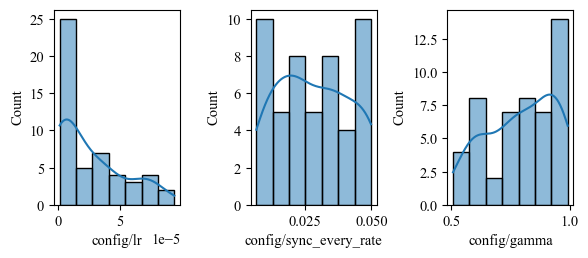

In [39]:
plt.figure(figsize=(6, 2.7))

for i, hyperparameter in enumerate(hyperparameters):
    plt.subplot(1, 3, i+1)
    sns.histplot(df["config/"+hyperparameter], kde=True)
    # plt.title(f"Distribution of {hyperparameter}")
plt.tight_layout()
plt.savefig('./report/Distribution of Hyperparameters.svg')

#### 超参数与平均累积奖励的关系

In [40]:
df_analysis

,trial_id,mean_reward,config/lr,config/sync_every_rate,config/gamma
0,6df61_00000,22.928,0.000007,0.036919,0.878763
1,6df61_00001,25.185,0.000042,0.047393,0.610932
2,6df61_00002,24.723,0.000076,0.022454,0.842037
3,6df61_00003,24.559,0.000040,0.032622,0.928088
4,6df61_00004,24.813,0.000029,0.012158,0.759309
5,6df61_00005,24.413,0.000041,0.039618,0.952075
6,6df61_00006,24.545,0.000094,0.009353,0.809661
7,6df61_00007,24.557,0.000002,0.008564,0.620912
8,6df61_00008,23.982,0.000003,0.020533,0.631940
9,6df61_00009,24.221,0.000001,0.017750,0.861178


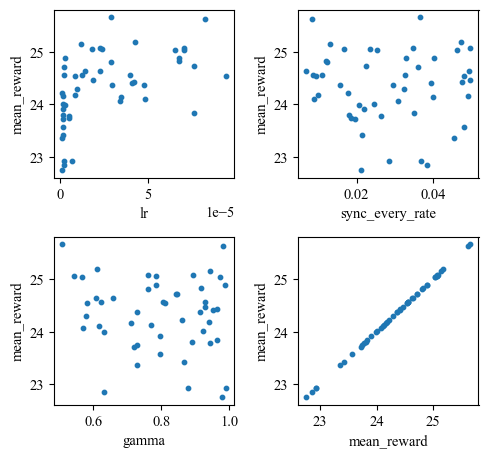

In [41]:
plt.figure(figsize=(5, 4.7))
for i, hyperparameter in enumerate(hyperparameters):

    plt.subplot(2, 2, i+1)
    plt.scatter(df_analysis["config/"+hyperparameter], df_analysis["mean_reward"], s=10)

    plt.xlabel(hyperparameter)
    plt.ylabel("mean_reward")
    # plt.title(f"{hyperparameter} vs MeanReward")
else:
    plt.subplot(2, 2, 4)
    plt.scatter(df_analysis["mean_reward"], df_analysis["mean_reward"], s=10)
    plt.xlabel("mean_reward")
    plt.ylabel("mean_reward")
    # plt.title(f"MeanReward vs MeanReward")
plt.tight_layout()
plt.savefig('./report/Scatter Plot Matrix View.svg')

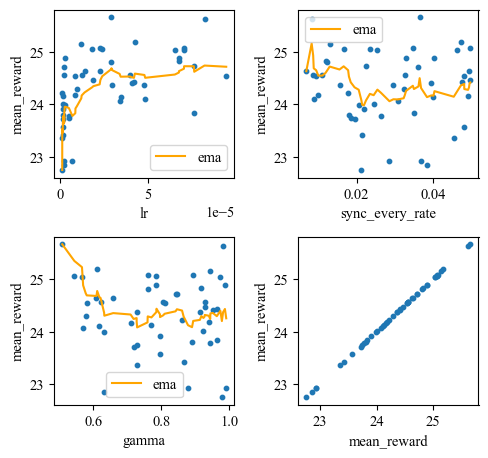

In [43]:
span= 50// 3
plt.figure(figsize=(5, 4.7))
for i, hyperparameter in enumerate(hyperparameters):

    plt.subplot(2, 2, i+1)
    plt.scatter(df_analysis["config/"+hyperparameter], df_analysis["mean_reward"], s=10)

    _df = df_analysis[["config/"+hyperparameter, "mean_reward"]].sort_values("config/"+hyperparameter)
    _df['ema'] = _df["mean_reward"].ewm(span=span).mean()
    plt.plot(_df["config/"+hyperparameter], _df['ema'], color='orange', label='ema')

    plt.xlabel(hyperparameter)
    plt.ylabel("mean_reward")
    plt.legend()
    # plt.title(f"{hyperparameter} vs MeanReward")
else:
    plt.subplot(2, 2, 4)
    plt.scatter(df_analysis["mean_reward"], df_analysis["mean_reward"], s=10)
    plt.xlabel("mean_reward")
    plt.ylabel("mean_reward")
    # plt.title(f"MeanReward vs MeanReward")
plt.tight_layout()
plt.savefig('./report/Scatter Plot Matrix View.svg')



In [44]:
df_analysis["mean_reward"].mean(),df_analysis["mean_reward"].std()


(24.33242, 0.6853823628204232)

In [14]:
import visdom

In [ ]:
viz = visdom.Visdom(env="3D")

Setting up a new session...


Connection to remote host was lost.
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_close() takes 1 positional argument but 3 were given
[Errno 111] Connection refused
Visdom.setup_socket.<locals>.on_clos

In [35]:
viz.scatter(
    X=df_analysis[["config/gamma", "config/sync_every_rate", "mean_reward"]].to_numpy(),
    opts=dict(
        markersize=1,
        xlabel='gamma',
        ylabel='sync',
        zlable='reward'
    ),

)

'window_3e20f316f0502a'

Text(0.5, 1.0, 'sync')

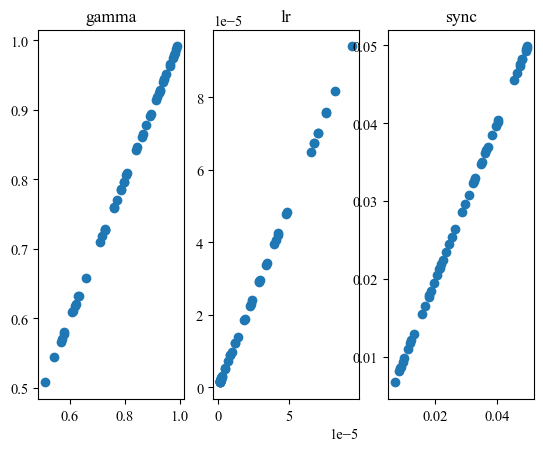

In [50]:
plt.subplot(1,3, 1)
plt.scatter(df_analysis["config/gamma"], df_analysis["config/gamma"])
plt.title("gamma")
plt.subplot(1,3, 2)
plt.scatter(df_analysis["config/lr"], df_analysis["config/lr"])
plt.title("lr")
plt.subplot(1,3, 3)
plt.scatter(df_analysis["config/sync_every_rate"], df_analysis["config/sync_every_rate"])
plt.title("sync")

#### 相关性分析

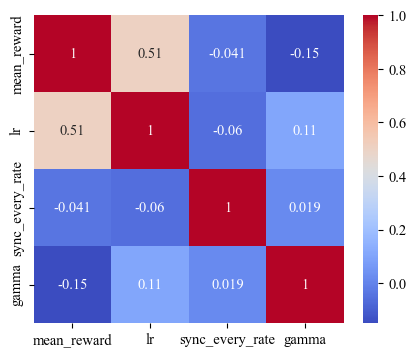

In [15]:
correlation_matrix = df_analysis[["mean_reward"] + ["config/"+hyperparameter for hyperparameter in hyperparameters]].corr()
plt.figure(figsize=(5, 4))
correlation_matrix.columns = ["mean_reward"] + hyperparameters
correlation_matrix.index = ["mean_reward"] + hyperparameters
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
plt.savefig("./report/Correlation Heatmap.svg")

#### 重要性分析

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = df_analysis[["config/"+hyperparameter for hyperparameter in hyperparameters]]
y = df_analysis["mean_reward"]

rf = RandomForestRegressor(n_estimators=100, random_state=SEED)
rf.fit(X, y)

RandomForestRegressor(random_state=20040508)

In [17]:
importance = pd.DataFrame(
    {
        "hyperparameter": hyperparameters,
        "importance": rf.feature_importances_
    }
).sort_values("importance", ascending=False)

Text(0.5, 1.0, 'hyperparameter Importance')

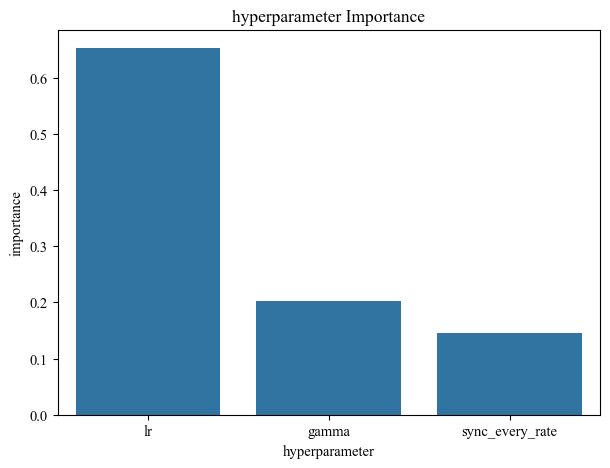

In [18]:
plt.figure(figsize=(7, 5))
sns.barplot(x="hyperparameter", y="importance", data=importance)
plt.title(f"hyperparameter Importance")

#### 交互效应分析

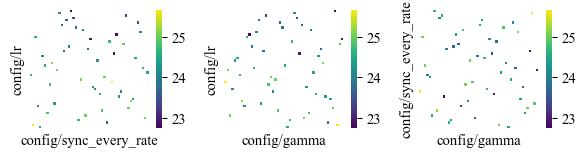

In [42]:
from itertools import combinations
plt.figure(figsize=(6, 1.7))
for i, (hyperparameter1, hyperparameter2) in enumerate(combinations(hyperparameters, 2)):
    plt.subplot(1, 3, i+1)
    pivot = df_analysis.pivot(index="config/"+hyperparameter1, columns="config/"+hyperparameter2, values="mean_reward")
    sns.heatmap(pivot, cmap="viridis", fmt='.3f')
    plt.xticks([])
    plt.yticks([])
    # plt.title(f"Interaction between {hyperparameter1} and {hyperparameter2}")
plt.tight_layout()
plt.savefig('./report/Interaction between hyperparameters.svg')


#### 最佳性能

In [15]:
best_config = df_analysis.sort_values("mean_reward", ascending=False).head(5)
best_config

,trial_id,mean_reward,config/lr,config/sync_every_rate,config/gamma
12,6df61_00012,25.661,0.000029,0.036554,0.507830
34,6df61_00034,25.626,0.000082,0.008165,0.982142
1,6df61_00001,25.185,0.000042,0.047393,0.610932
29,6df61_00029,25.144,0.000012,0.012915,0.944741
49,6df61_00049,25.083,0.000070,0.049696,0.894043


In [16]:
best_config.to_csv('./report/hyperparameter_top5.csv')

#### 敏感性指数计算

In [127]:
def sensitivity_index(hyperparameter, df):
    return df[hyperparameter].std() / df[hyperparameter].mean() * df["mean_reward"].corr(df[hyperparameter])

sensitivity = {hyperparameter: sensitivity_index(hyperparameter="config/"+hyperparameter, df=df_analysis) for hyperparameter in hyperparameters}
sensitivity

{'lr': 0.52433057826602,
 'sync_every_rate': -0.020018009628746523,
 'gamma': -0.02721481613491774}

In [27]:
def generate_report(df_analysis):
    report = "Hyperparameter Sensitivity Analysis Report\n"
    report += "=" * 40 + '\n\n'

    report += "1. Dataset Summary:\n"
    report += df_analysis.describe().to_string() + "\n\n"

    report += "2. Best Configurations:\n"
    report += best_config.to_string() + "\n\n"

    report += "3. Correlation with MeanReward:\n"
    report += df_analysis[["mean_reward"] + ["config/"+hyperparameter for hyperparameter in hyperparameters]].corr()["mean_reward"].to_string() + "\n\n"

    report += "4. Sensitivity Indices:\n"
    report += pd.Series(sensitivity).to_string() + "\n\n"

    report += "5. Hyperparameter Importance:\n"
    report += importance.to_string() + "\n"

    return report

print(generate_report(df_analysis=df_analysis))

Hyperparameter Sensitivity Analysis Report

1. Dataset Summary:
       mean_reward  config/lr  config/sync_every_rate  config/gamma
count    50.000000  50.000000               50.000000     50.000000
mean     24.332420   0.000026                0.028391      0.794353
std       0.685382   0.000027                0.013731      0.144385
min      22.753000   0.000001                0.006758      0.507830
25%      23.925750   0.000002                0.017803      0.670911
50%      24.418000   0.000016                0.027511      0.801010
75%      24.820500   0.000042                0.039335      0.926698
max      25.661000   0.000094                0.049866      0.991436

2. Best Configurations:
       trial_id  mean_reward  config/lr  config/sync_every_rate  config/gamma
12  6df61_00012       25.661   0.000029                0.036554      0.507830
34  6df61_00034       25.626   0.000082                0.008165      0.982142
1   6df61_00001       25.185   0.000042                0.047393  